<H1>SALES DATA ANALYSIS</H1>

Import libraries

In [3]:
import numpy as np
import pandas as pd

In [5]:
#Load the dataset
df = pd.read_csv('Sales Data.csv')
print (df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [7]:
#Add Revenue column
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  Revenue  
0  1700.00   New York City     0  1700.00 

In [8]:
#check for missing values
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Revenue             0
dtype: int64


In [9]:
#convert date column to date format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [10]:
#Extract year, month, and day for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [11]:
#check for updated dataset
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  Revenue  Year

In [13]:
#Top 10 most sold products
most_sold = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Sold Products:\n", most_sold)

Top 10 Most Sold Products:
 Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


In [14]:
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for visualizations

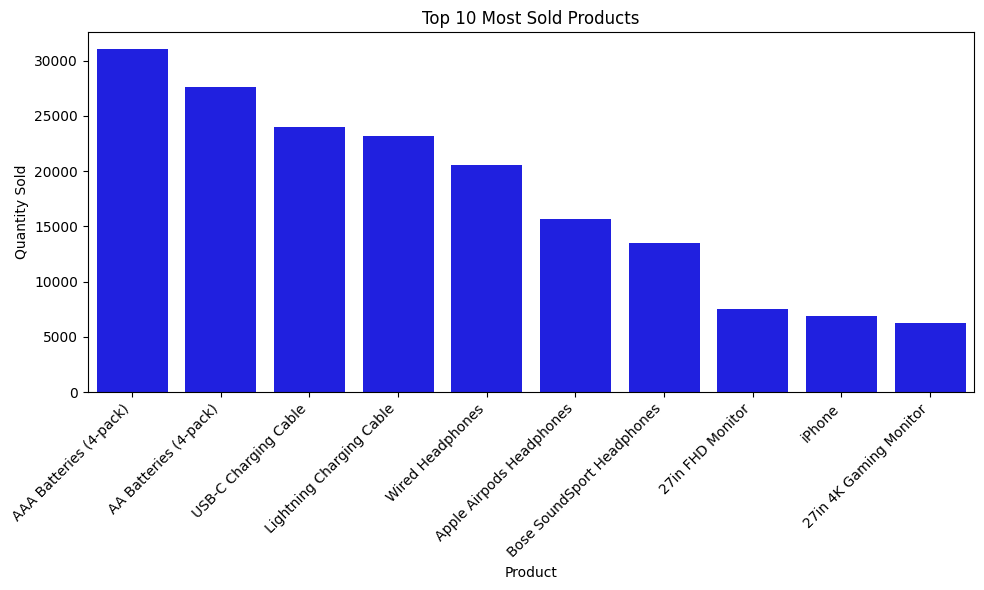

In [15]:
#visualizing top 10 most sold products
plt.figure(figsize=(10, 6))
sns.barplot(x=most_sold.index, y=most_sold.values, color='blue')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
#calculate total revenue per product and sort in descending order
most_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("Top 10 Revenue-Generating Products:\n", most_revenue.head(10))

Top 10 Revenue-Generating Products:
 Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Revenue, dtype: float64


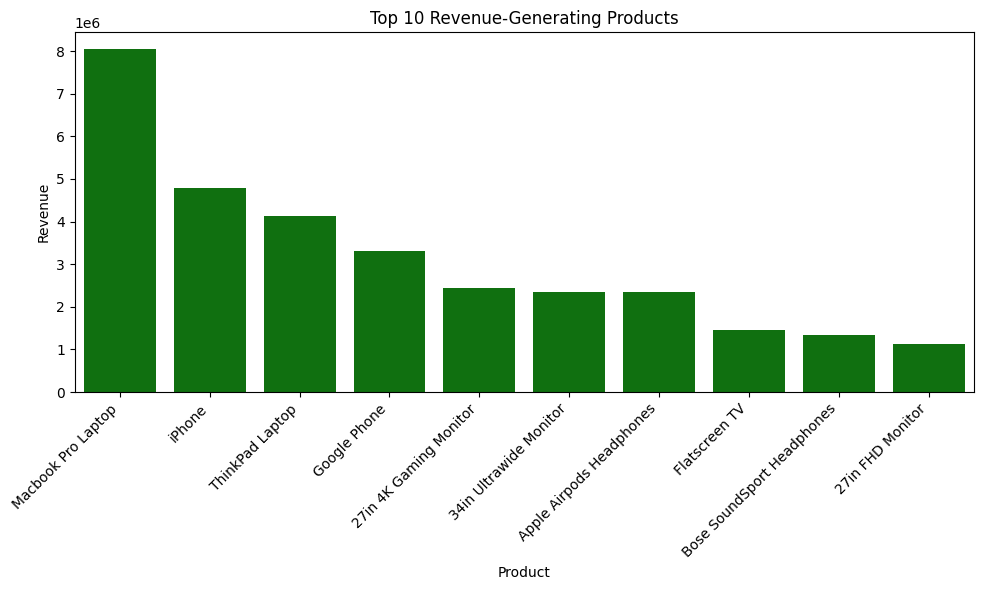

In [17]:
#Visualization using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=most_revenue.head(10).index, y=most_revenue.head(10).values, color='green')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01')])

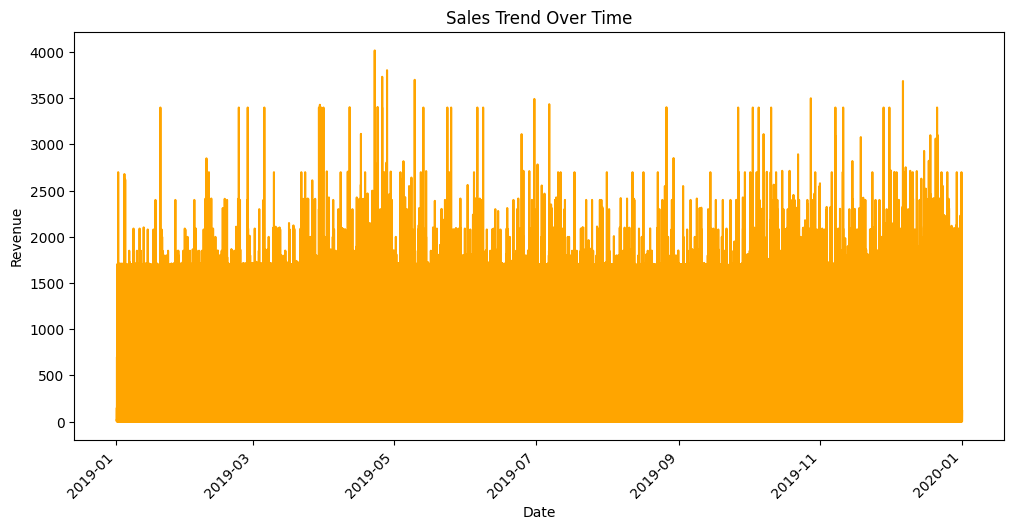

In [18]:
#sales trend over time
sales_trend = df.groupby('Order Date')['Revenue'].sum()
#visualization
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', color='orange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

In [19]:
#Extracting the month from daye column which had the highest sales
df['Month'] = df['Order Date'].dt.month
#group by month and calculate total revenue
monthly_sales = df.groupby('Month')['Revenue'].sum().sort_values(ascending=True)
print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
 Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Revenue, dtype: float64


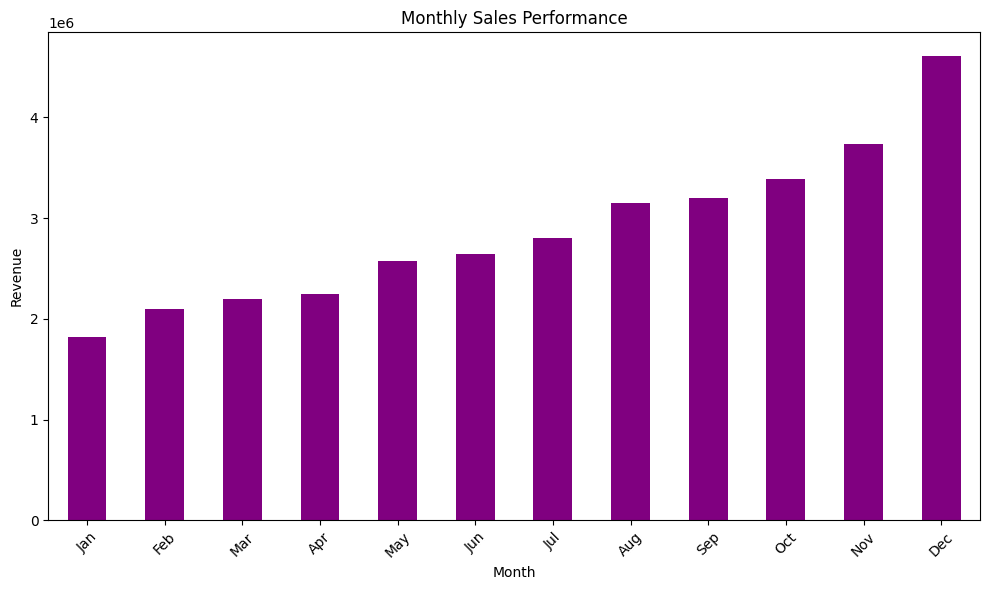

In [23]:
#visualization
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='purple')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


In [24]:
#peak sales day
#group by daye and calculate total revenue
daily_sales = df.groupby('Order Date')['Revenue'].sum().sort_values(ascending=False)
#display date with highest revenue
peak_sales_day = daily_sales.idxmax()
peak_sales_amount = daily_sales.max()
print(f"The peak sales Day was {peak_sales_day},with a revenue of {peak_sales_amount}.")

The peak sales Day was 2019-04-22 13:26:00,with a revenue of 4017.94.


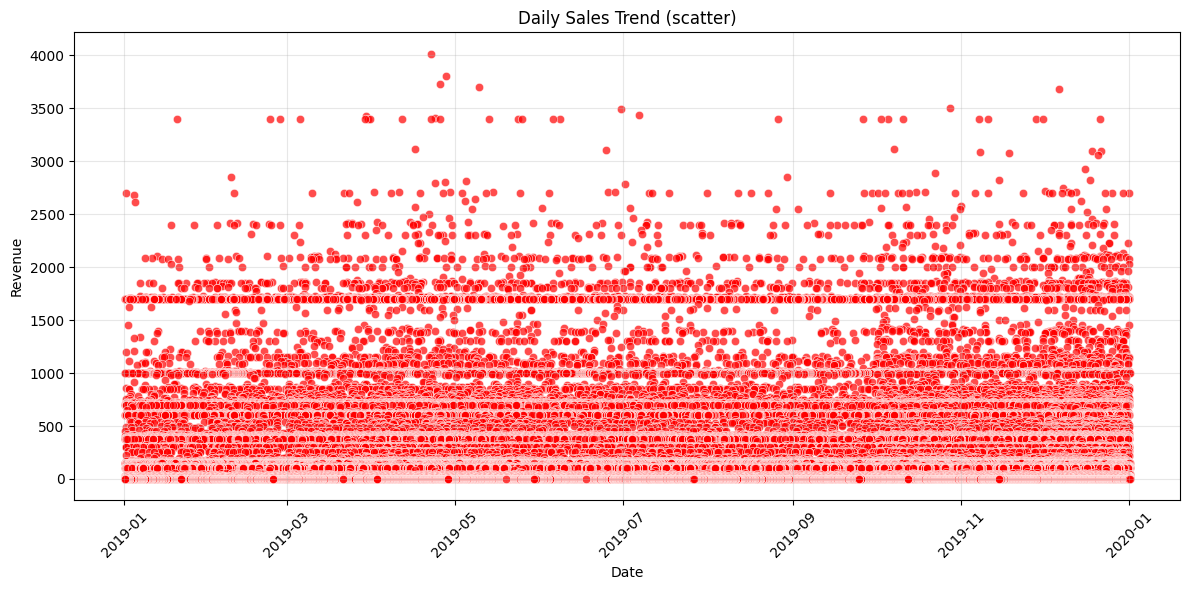

In [25]:
#visualizing daily sales trend
plt.figure(figsize=(12, 6))
sns.scatterplot(x=daily_sales.index, y=daily_sales.values, color='red', alpha=0.7)
plt.title('Daily Sales Trend (scatter)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
#calculate the average revenue per transaction using mean() function
average_revenue_per_transaction = df['Revenue'].mean()
print(f"Average Revenue per Transaction: $ {average_revenue_per_transaction:.2f}")

Average Revenue per Transaction: $ 185.49


In [27]:
#calculating total quantity ordered per product and sort in descending order
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
#display top 10 products
print("Top 10 Products by Quantity sold:\n", top_products)

Top 10 Products by Quantity sold:
 Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


<ipython-input-28-609880b2a7fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


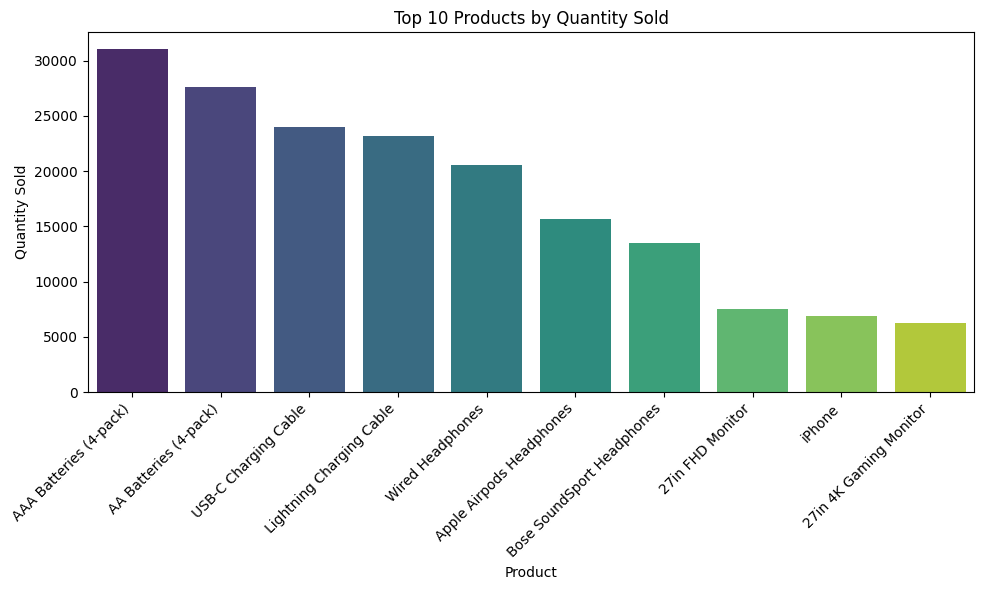

In [28]:
#visualizing using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
#filtering rows with numeric data
valid_rows = df[pd.to_numeric(df['Price Each'], errors='coerce').notna() &
                pd.to_numeric(df['Quantity Ordered'], errors='coerce').notna()]
#converting columns to numeric
valid_rows['Price Each'] = pd.to_numeric(valid_rows['Price Each'])
valid_rows['Quantity Ordered'] = pd.to_numeric(valid_rows['Quantity Ordered'])
#Retain only numeric columns for correlation
numeric_data = valid_rows.select_dtypes(include=['float64', 'int64'])
print("Numeric Data for correlation:")
print(numeric_data.head())

Numeric Data for correlation:
   Unnamed: 0  Order ID  Quantity Ordered  Price Each    Sales  Hour  Revenue
0           0    295665                 1     1700.00  1700.00     0  1700.00
1           1    295666                 1      600.00   600.00     7   600.00
2           2    295667                 1       11.95    11.95    18    11.95
3           3    295668                 1      149.99   149.99    15   149.99
4           4    295669                 1       11.95    11.95    12    11.95


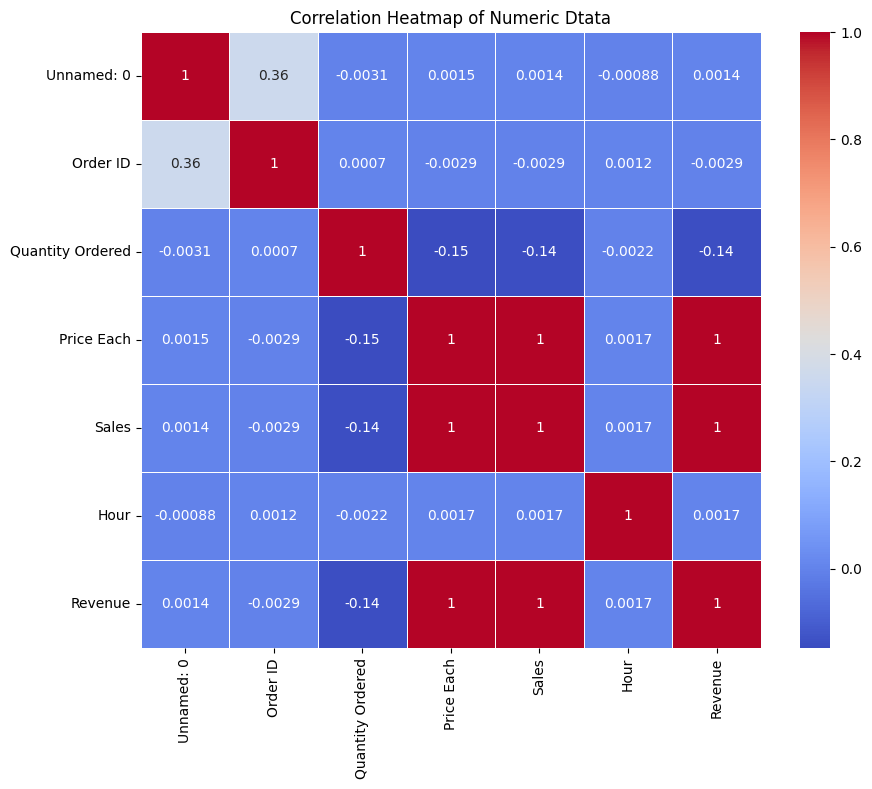

In [30]:
#visualizing correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Dtata')
plt.show()

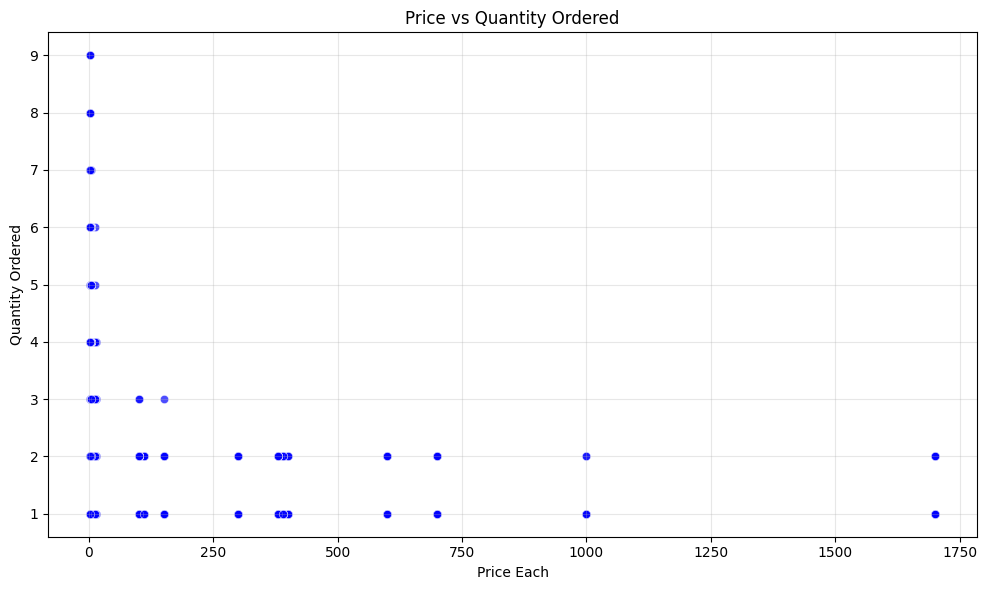

In [31]:
#visualization- scatter plot of price vs quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=numeric_data, color='blue', alpha=0.7)
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

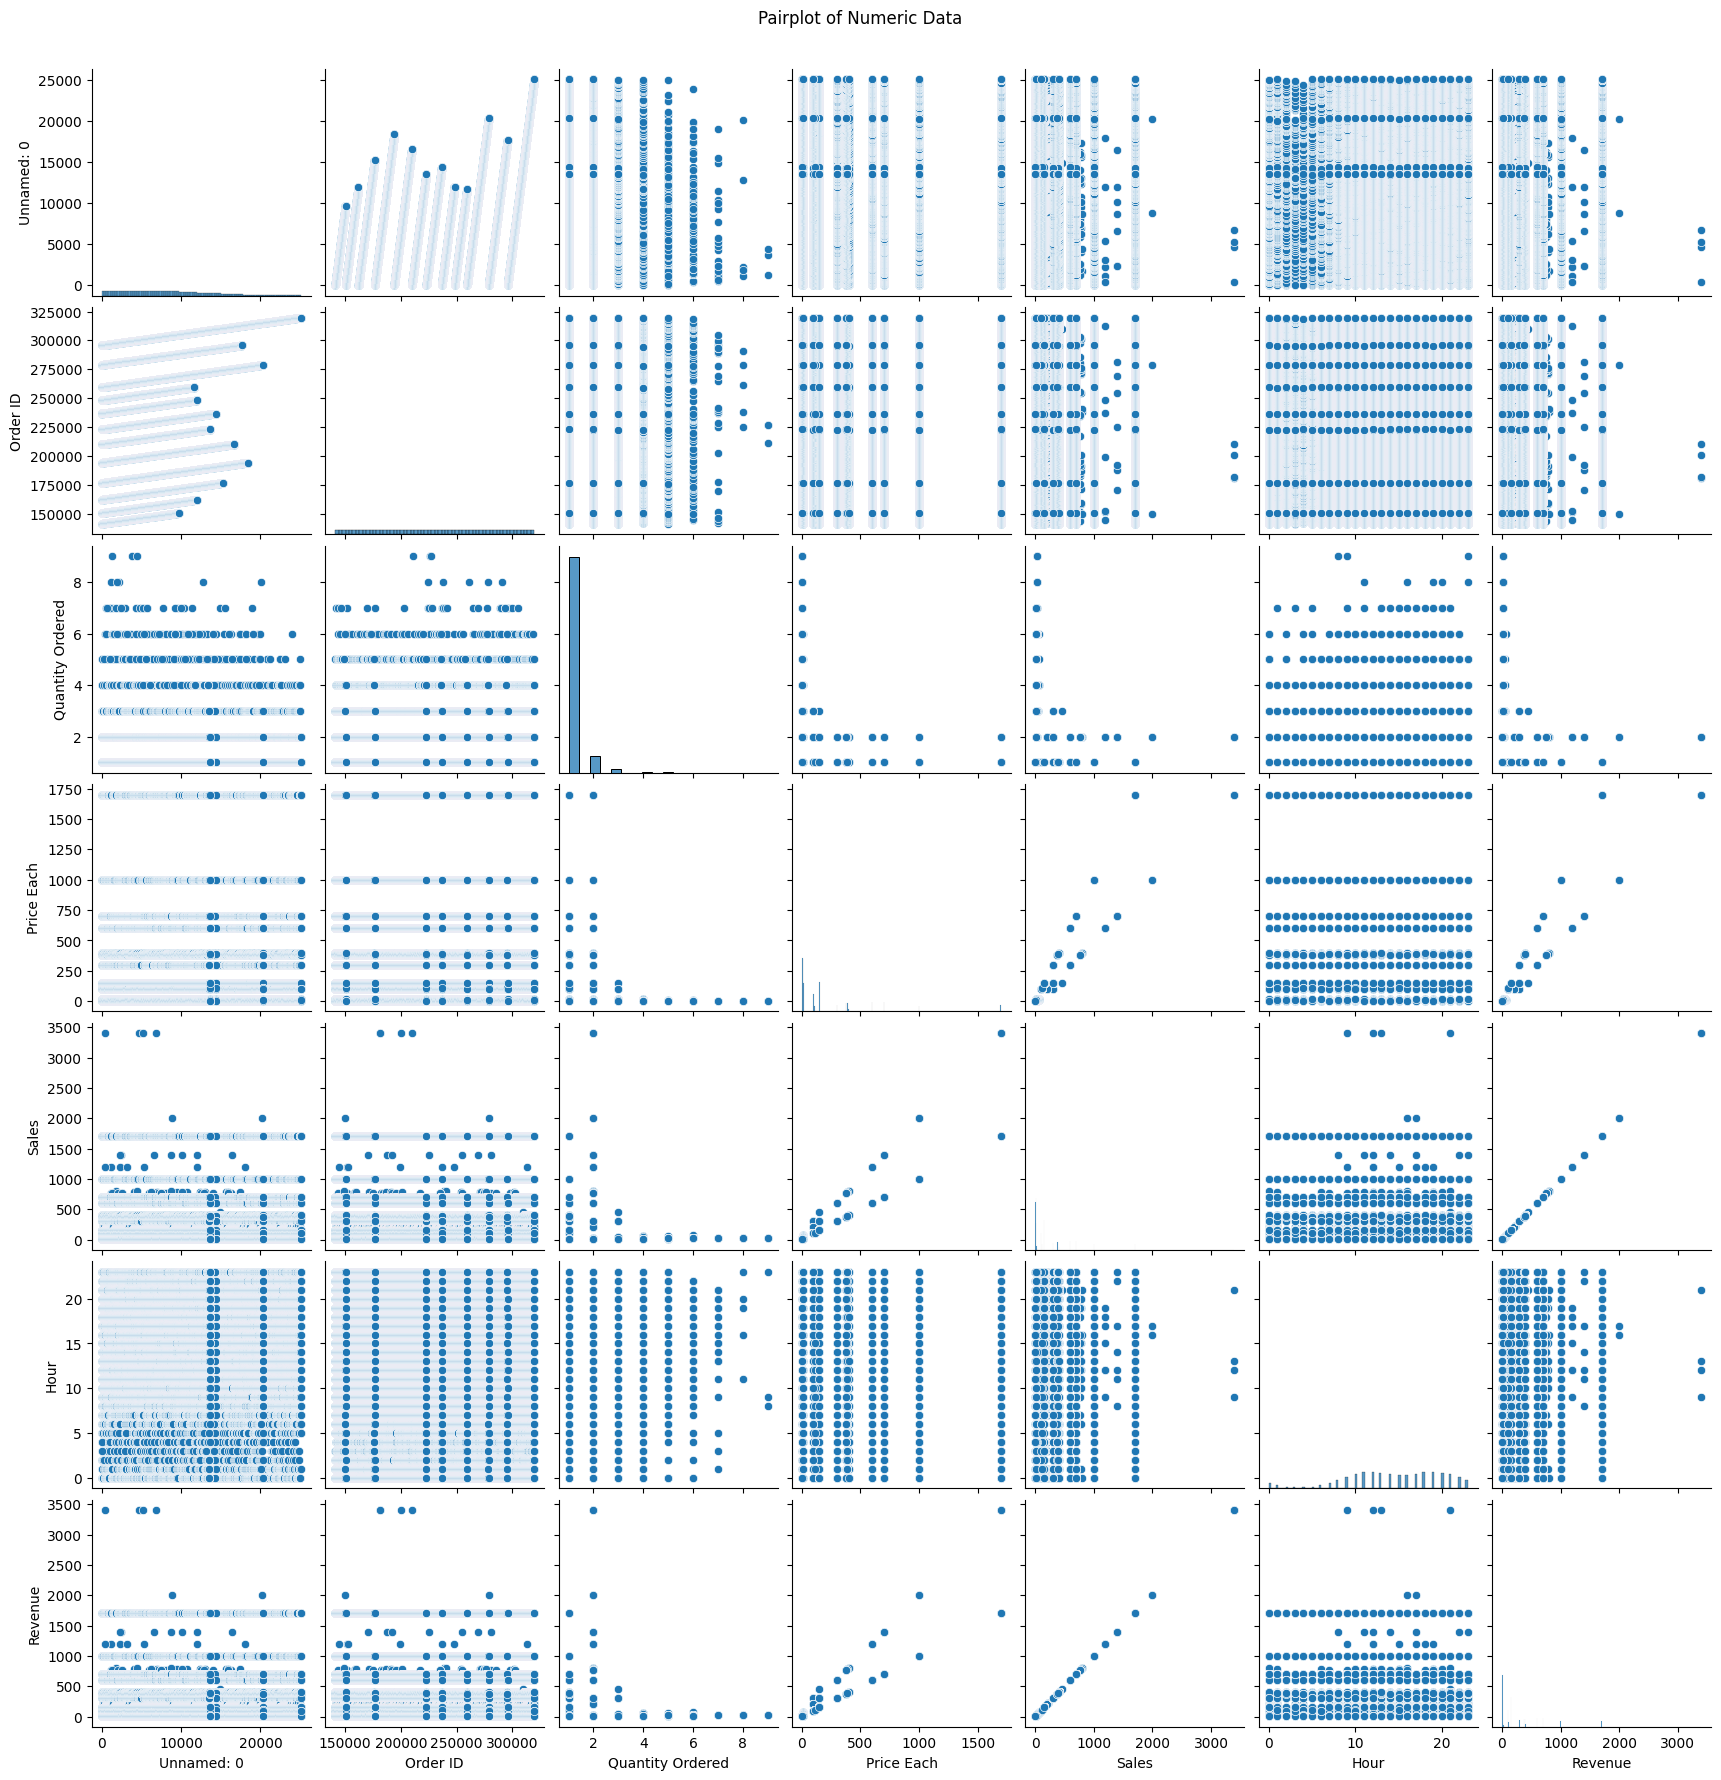

In [32]:
#visualizatio- pairplot
sns.pairplot(numeric_data)
plt.suptitle('Pairplot of Numeric Data', y=1.02)
plt.show()